In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import math

## A data by a tour and travel agency which deals in selling holiday packages is available. Data provides details of 872 employees of a company. Among these employees, some opted for the holiday package and some didn't. Lets us analyze and predict whether an employee will opt for the package or not on the basis of the information given in the data set. Also, let us find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


In [35]:
df2 = pd.read_csv('Holiday_Package.csv')

In [36]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [37]:
df2.shape

(872, 8)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [39]:
df2.describe(include='all')

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,471,NaN,NaN,NaN,NaN,NaN,656
mean,436.500000,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,251.869014,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,1.000000,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,218.750000,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,436.500000,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,654.250000,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [40]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### There are no null values in the dataset.

In [41]:
df2.duplicated().any()

False

In [42]:
df2.quantile(0.75)-df2.quantile(0.25)

Unnamed: 0             435.5
Salary               18145.5
age                     16.0
educ                     4.0
no_young_children        0.0
no_older_children        2.0
dtype: float64

In [43]:
df2.var()

Unnamed: 0           6.343800e+04
Salary               5.484340e+08
age                  1.113378e+02
educ                 9.218867e+00
no_young_children    3.756096e-01
no_older_children    1.181104e+00
dtype: float64

In [44]:
df2.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

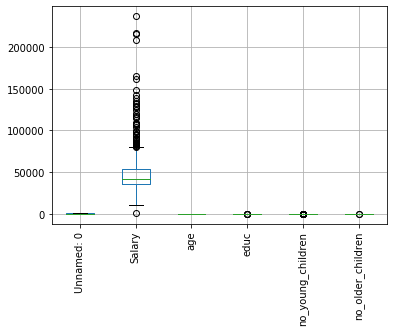

In [45]:
df2.boxplot()
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC85D78148>,
      dtype=object)

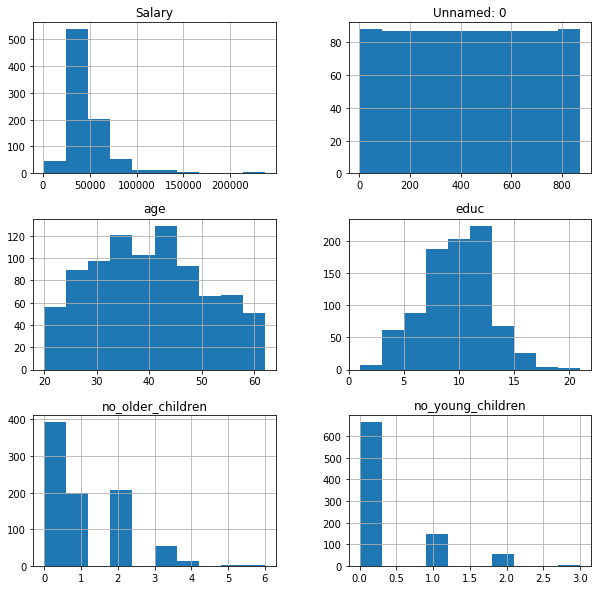

In [46]:
df2.hist(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

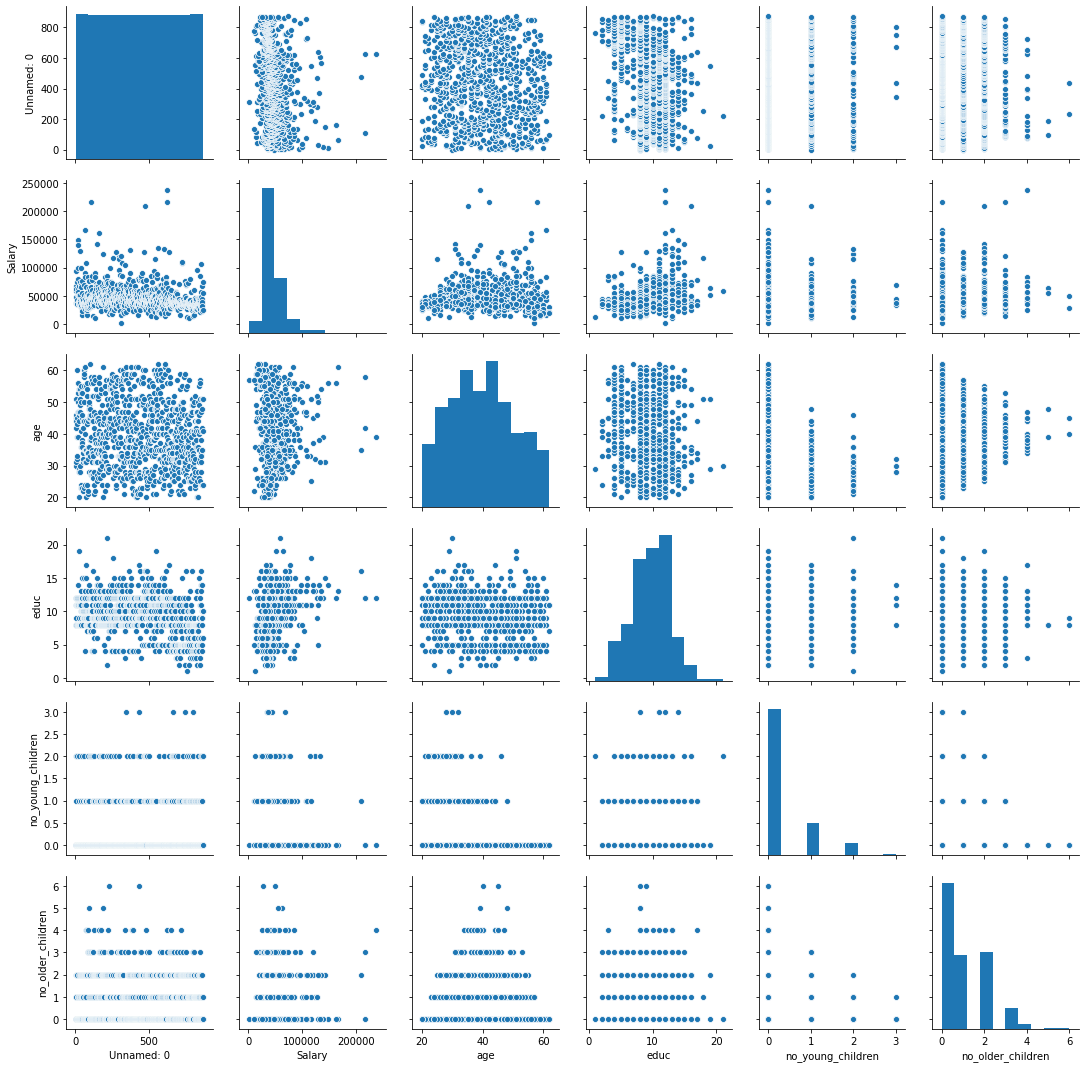

In [174]:
plt.figure(figsize=(10,10))
sns.pairplot(df2)

In [47]:
df2.cov()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,6.343800e+04,-1.139867e+06,-275.815729,-226.374282,8.049369,-7.076349
Salary,-1.139867e+06,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755
age,-2.758157e+02,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573
educ,-2.263743e+02,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851
no_young_children,8.049369e+00,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807
no_older_children,-7.076349e+00,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104


In [48]:
df2.corr()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.193249,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.193249,1.000000,0.071709,0.326540,-0.029664,0.113772
age,-0.103782,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.113772,-0.116205,-0.036321,-0.238428,1.000000


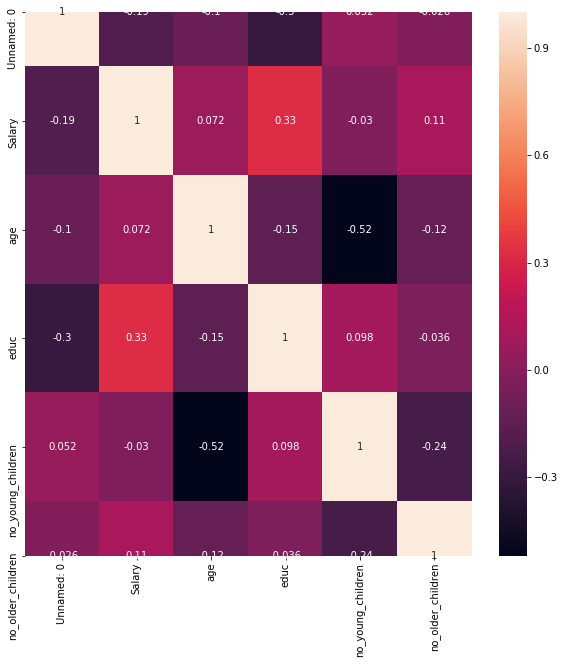

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)

### From the Pairplot and the heatmap, below is the observation of correlation between the variables:
#### •	The variable Salary is positively correlated with Education with correlation of 0.33, which is not a high number
#### •	There is negative correlation between number of young children and age variables
#### •	Apart from these there is very minimal correlation between rest of the variables
### The output variable Holiday package and one of the independent variable Foreign are in object data type. These will be converted to integers by encoding, in later parts of the project.


## Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [50]:
df2.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [51]:
### Dropping the unwanted column 'Unnamed: 0'
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [52]:
## Encoding the data:

for feature in df2:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

In [53]:
df2.dtypes

Holliday_Package      int8
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

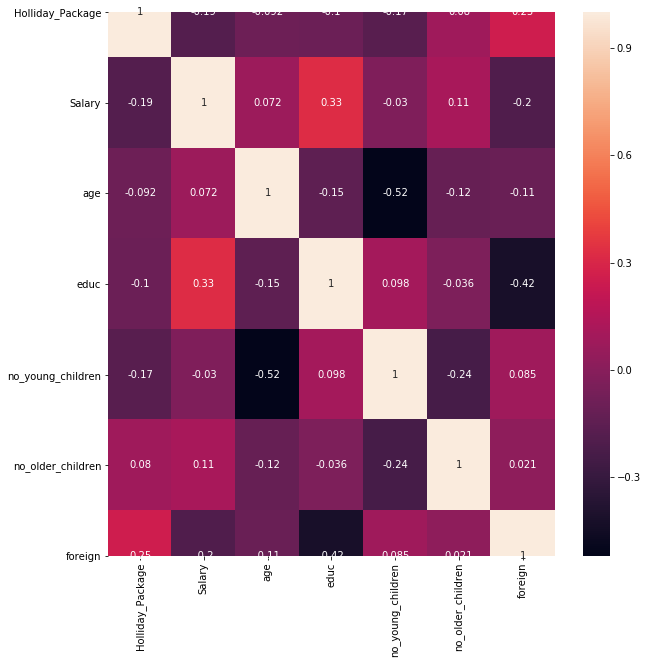

In [55]:
## Checking the Heatmap for correlation between the variables after encoding the dataset:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)

In [201]:
x = df2.drop('Holliday_Package', axis=1)
y = df2.pop('Holliday_Package')

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [205]:
log_reg = LogisticRegression()

In [206]:
log_reg.fit(x_train, y_train)

C:\Users\nlokesh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
log_reg_train_predict = log_reg.predict(x_train)
log_reg_test_predict = log_reg.predict(x_test)

In [210]:
lda = LinearDiscriminantAnalysis()

In [211]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [214]:
lda_train_predict = lda.predict(x_train)
lda_test_predict = lda.predict(x_test)

## Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### For Logistic Regression:

In [216]:
accuracy_score(y_train, log_reg_train_predict)

0.5639344262295082

In [219]:
accuracy_score(y_test, log_reg_test_predict)

0.4847328244274809

In [221]:
confusion_matrix(y_train, log_reg_train_predict )

array([[343,   1],
       [265,   1]], dtype=int64)

In [222]:
confusion_matrix(y_test, log_reg_test_predict )

array([[126,   1],
       [134,   1]], dtype=int64)

In [223]:
print(classification_report(y_train, log_reg_train_predict))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       344
           1       0.50      0.00      0.01       266

    accuracy                           0.56       610
   macro avg       0.53      0.50      0.36       610
weighted avg       0.54      0.56      0.41       610



In [224]:
print(classification_report(y_test, log_reg_test_predict))

              precision    recall  f1-score   support

           0       0.48      0.99      0.65       127
           1       0.50      0.01      0.01       135

    accuracy                           0.48       262
   macro avg       0.49      0.50      0.33       262
weighted avg       0.49      0.48      0.32       262



In [225]:
roc_auc_score(y_train, log_reg_train_predict)

0.5004262108760272

In [226]:
roc_auc_score(y_test, log_reg_test_predict)

0.4997666958296879

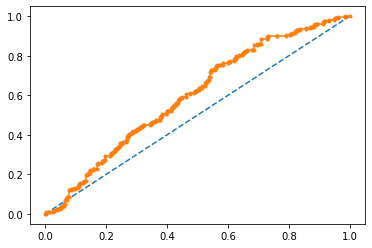

In [229]:
fpr_log_reg_train, tpr_log_reg_train, tresholds_log_reg_train = roc_curve(y_train, log_reg.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_log_reg_train, tpr_log_reg_train, marker='.')

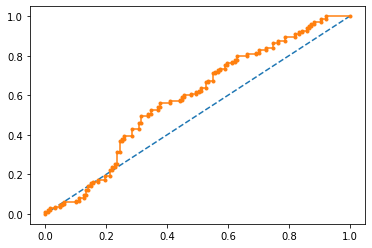

In [230]:
fpr_log_reg_test, tpr_log_reg_test, tresholds_log_reg_test = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_log_reg_test, tpr_log_reg_test, marker='.')

### For LDA:

In [231]:
accuracy_score(y_train, lda_train_predict)

0.6836065573770492

In [232]:
accuracy_score(y_test, lda_test_predict)

0.6145038167938931

In [233]:
confusion_matrix(y_train, lda_train_predict )

array([[279,  65],
       [128, 138]], dtype=int64)

In [234]:
confusion_matrix(y_test, lda_test_predict )

array([[102,  25],
       [ 76,  59]], dtype=int64)

In [235]:
print(classification_report(y_train, lda_train_predict))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.52      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.66      0.67       610
weighted avg       0.68      0.68      0.68       610



In [236]:
print(classification_report(y_test, lda_test_predict))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       127
           1       0.70      0.44      0.54       135

    accuracy                           0.61       262
   macro avg       0.64      0.62      0.60       262
weighted avg       0.64      0.61      0.60       262



In [237]:
roc_auc_score(y_train, lda_train_predict)

0.6649217520545551

In [238]:
roc_auc_score(y_test, lda_test_predict)

0.6200933216681248

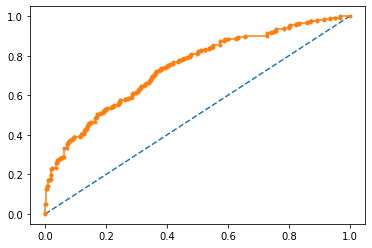

In [239]:
fpr_lda_train, tpr_lda_train, tresholds_lda_train = roc_curve(y_train, lda.predict_proba(x_train)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_lda_train, tpr_lda_train, marker='.')

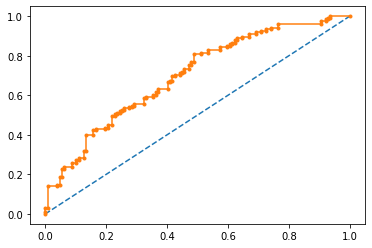

In [240]:
fpr_lda_test, tpr_lda_test, tresholds_lda_test = roc_curve(y_test, lda.predict_proba(x_test)[:,1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_lda_test, tpr_lda_test, marker='.')

### From the performance metrics above, we can see that the results of LDA is better than logistic regression.
### The model built on LDA has better roc_auc_score and accuracy score when compared to logistic regression. ### The recall and f1 scores for Logistic regression is too low when compared to LDA.
### Hence, we can say that the model build on LDA is performing better whne compared to logistic regression.


## Inference: Basis on these predictions, what are the insights and recommendations.

### The variables in the dataset doesn’t seem to be having high correlation with the output variable. The company may have to consider concentrating on other attributes which could potentially have higher correlation with the output factor.
### The output variable is having positive correlation of 0.25 with the column ‘Foreign’. So, concentrating on these employees could have better conversion rate when it comes to buying the holiday package.
### When is comes to choosing the model, Linear Discriminant Analysis seems to be performing better when compares to Logistic regression.
